In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

In [2]:
#Import Dataset

df = pd.read_csv("D:\ExcelR\Data Science\Assignments\Association Rule\my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df = pd.get_dummies(df)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [4]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000,...,0.100000,0.100000,0.100000,0.600000,0.100000,0.100000,0.100000,0.400000,0.200000,0.100000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637,...,0.316228,0.316228,0.316228,0.516398,0.316228,0.316228,0.316228,0.516398,0.421637,0.316228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

Sixth Sense         0
Gladiator           0
LOTR1               0
Harry Potter1       0
Patriot             0
LOTR2               0
Harry Potter2       0
LOTR                0
Braveheart          0
Green Mile          0
V1_Gladiator        0
V1_Harry Potter1    0
V1_LOTR1            0
V1_Sixth Sense      0
V2_Harry Potter2    0
V2_LOTR             0
V2_LOTR1            0
V2_LOTR2            0
V2_Patriot          0
V3_Braveheart       0
V3_Gladiator        0
V3_Harry Potter1    0
V3_Sixth Sense      0
V4_Green Mile       0
V5_LOTR2            0
dtype: int64

### Association Rules with Different Support and Confidence Values

In [6]:
support_values = [0.1, 0.15, 0.2]
confidence_values = [0.6, 0.7, 0.8]

for support in support_values:
    for confidence in confidence_values:
        # Generate frequent itemsets
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
        
        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        
        print(f"Support={support}, Confidence={confidence}")
        print("Number of Rules:", len(rules))

Support=0.1, Confidence=0.6
Number of Rules: 56961
Support=0.1, Confidence=0.7
Number of Rules: 56760
Support=0.1, Confidence=0.8
Number of Rules: 56759
Support=0.15, Confidence=0.6
Number of Rules: 624
Support=0.15, Confidence=0.7
Number of Rules: 423
Support=0.15, Confidence=0.8
Number of Rules: 422
Support=0.2, Confidence=0.6
Number of Rules: 624
Support=0.2, Confidence=0.7
Number of Rules: 423
Support=0.2, Confidence=0.8
Number of Rules: 422


In [7]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
2,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
3,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,(V4_Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
...,...,...,...,...,...,...,...,...,...,...
417,"(V3_Sixth Sense, Patriot)","(V1_Gladiator, V2_Patriot, Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
418,"(V3_Sixth Sense, Sixth Sense)","(V1_Gladiator, V2_Patriot, Patriot, Gladiator)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
419,"(Gladiator, Sixth Sense)","(V3_Sixth Sense, V1_Gladiator, V2_Patriot, Pat...",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0,1.000000
420,"(V3_Sixth Sense, Gladiator)","(V1_Gladiator, V2_Patriot, Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000


### Change Minimum Length in Apriori Algorithm

In [8]:
min_length = 2

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x)) >= min_length]

print(f"Rules with Minimum Length {min_length}:")
print("Number of Rules:", len(filtered_rules))

Rules with Minimum Length 2:
Number of Rules: 54665


In [10]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
103,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.10,2.0,0.500000
104,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,0.500000
105,"(LOTR, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
106,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
108,"(Green Mile, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
56752,"(V5_LOTR2, V4_Green Mile)","(Harry Potter1, V3_Harry Potter1, V1_Sixth Sen...",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
56753,"(LOTR1, V4_Green Mile)","(Harry Potter1, V3_Harry Potter1, V1_Sixth Sen...",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
56754,"(Green Mile, V5_LOTR2)","(Harry Potter1, V3_Harry Potter1, V1_Sixth Sen...",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
56755,"(Green Mile, LOTR1)","(Harry Potter1, V3_Harry Potter1, V1_Sixth Sen...",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000


### Visualize Obtained Rules

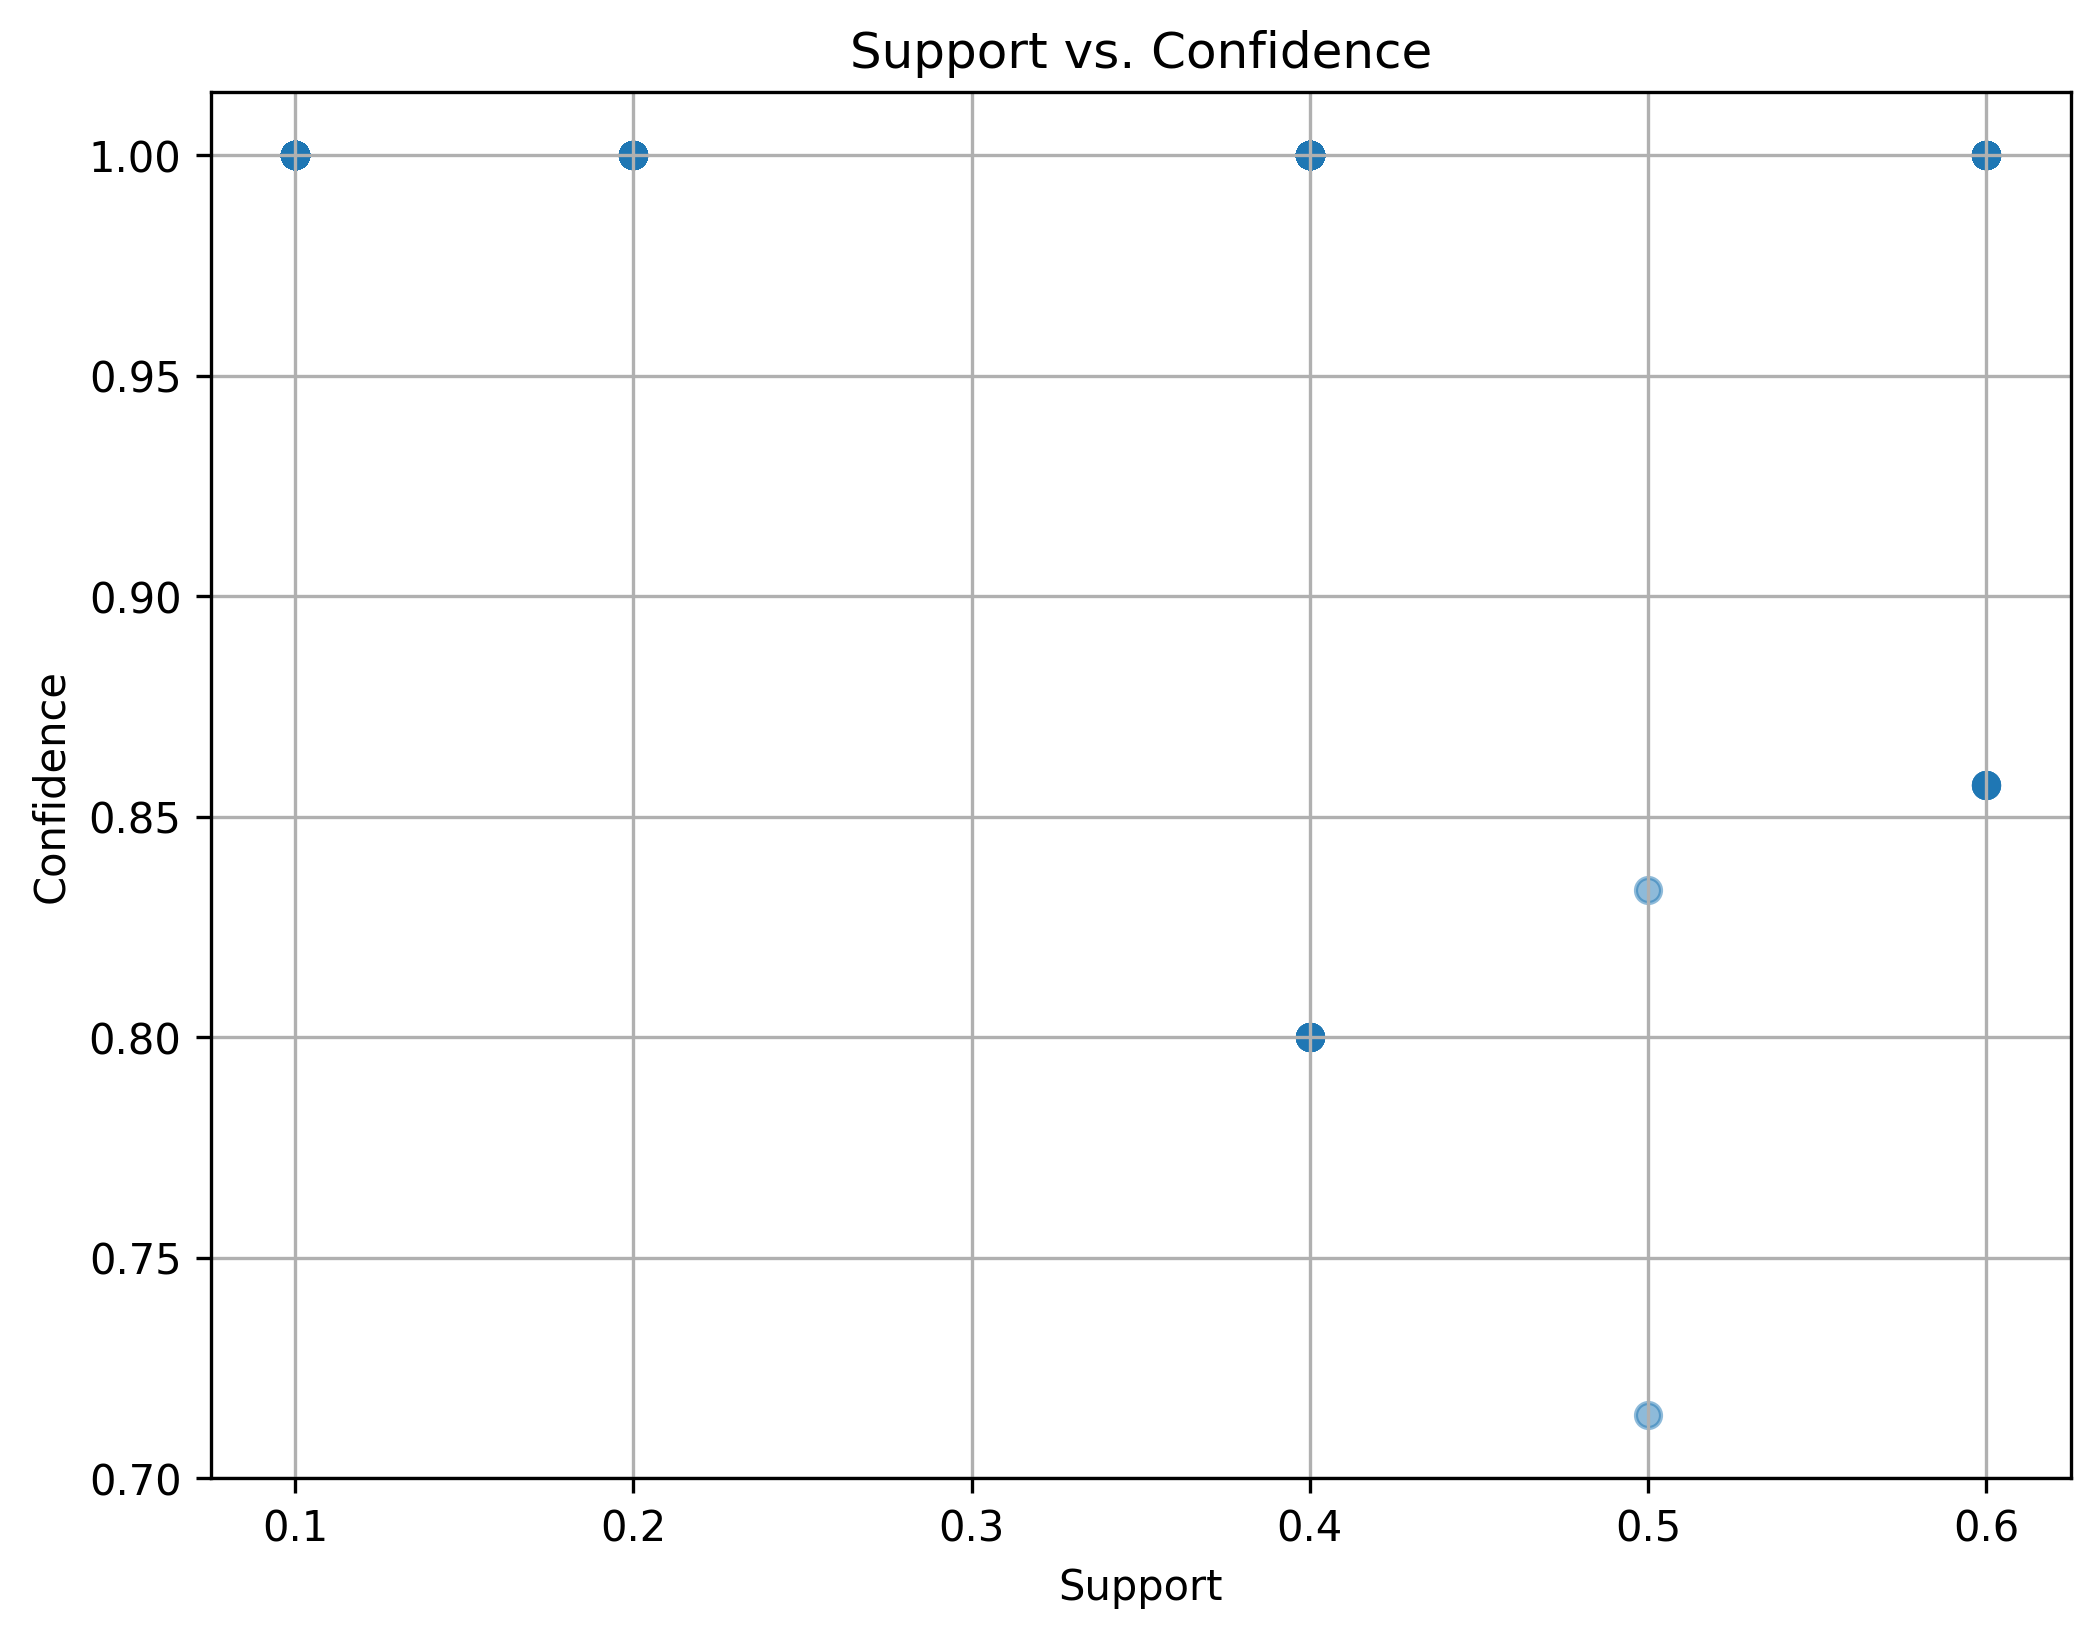

In [11]:
# Scatter plot of support vs. confidence

plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)

Text(0.5, 1.0, 'Support vs Lift')

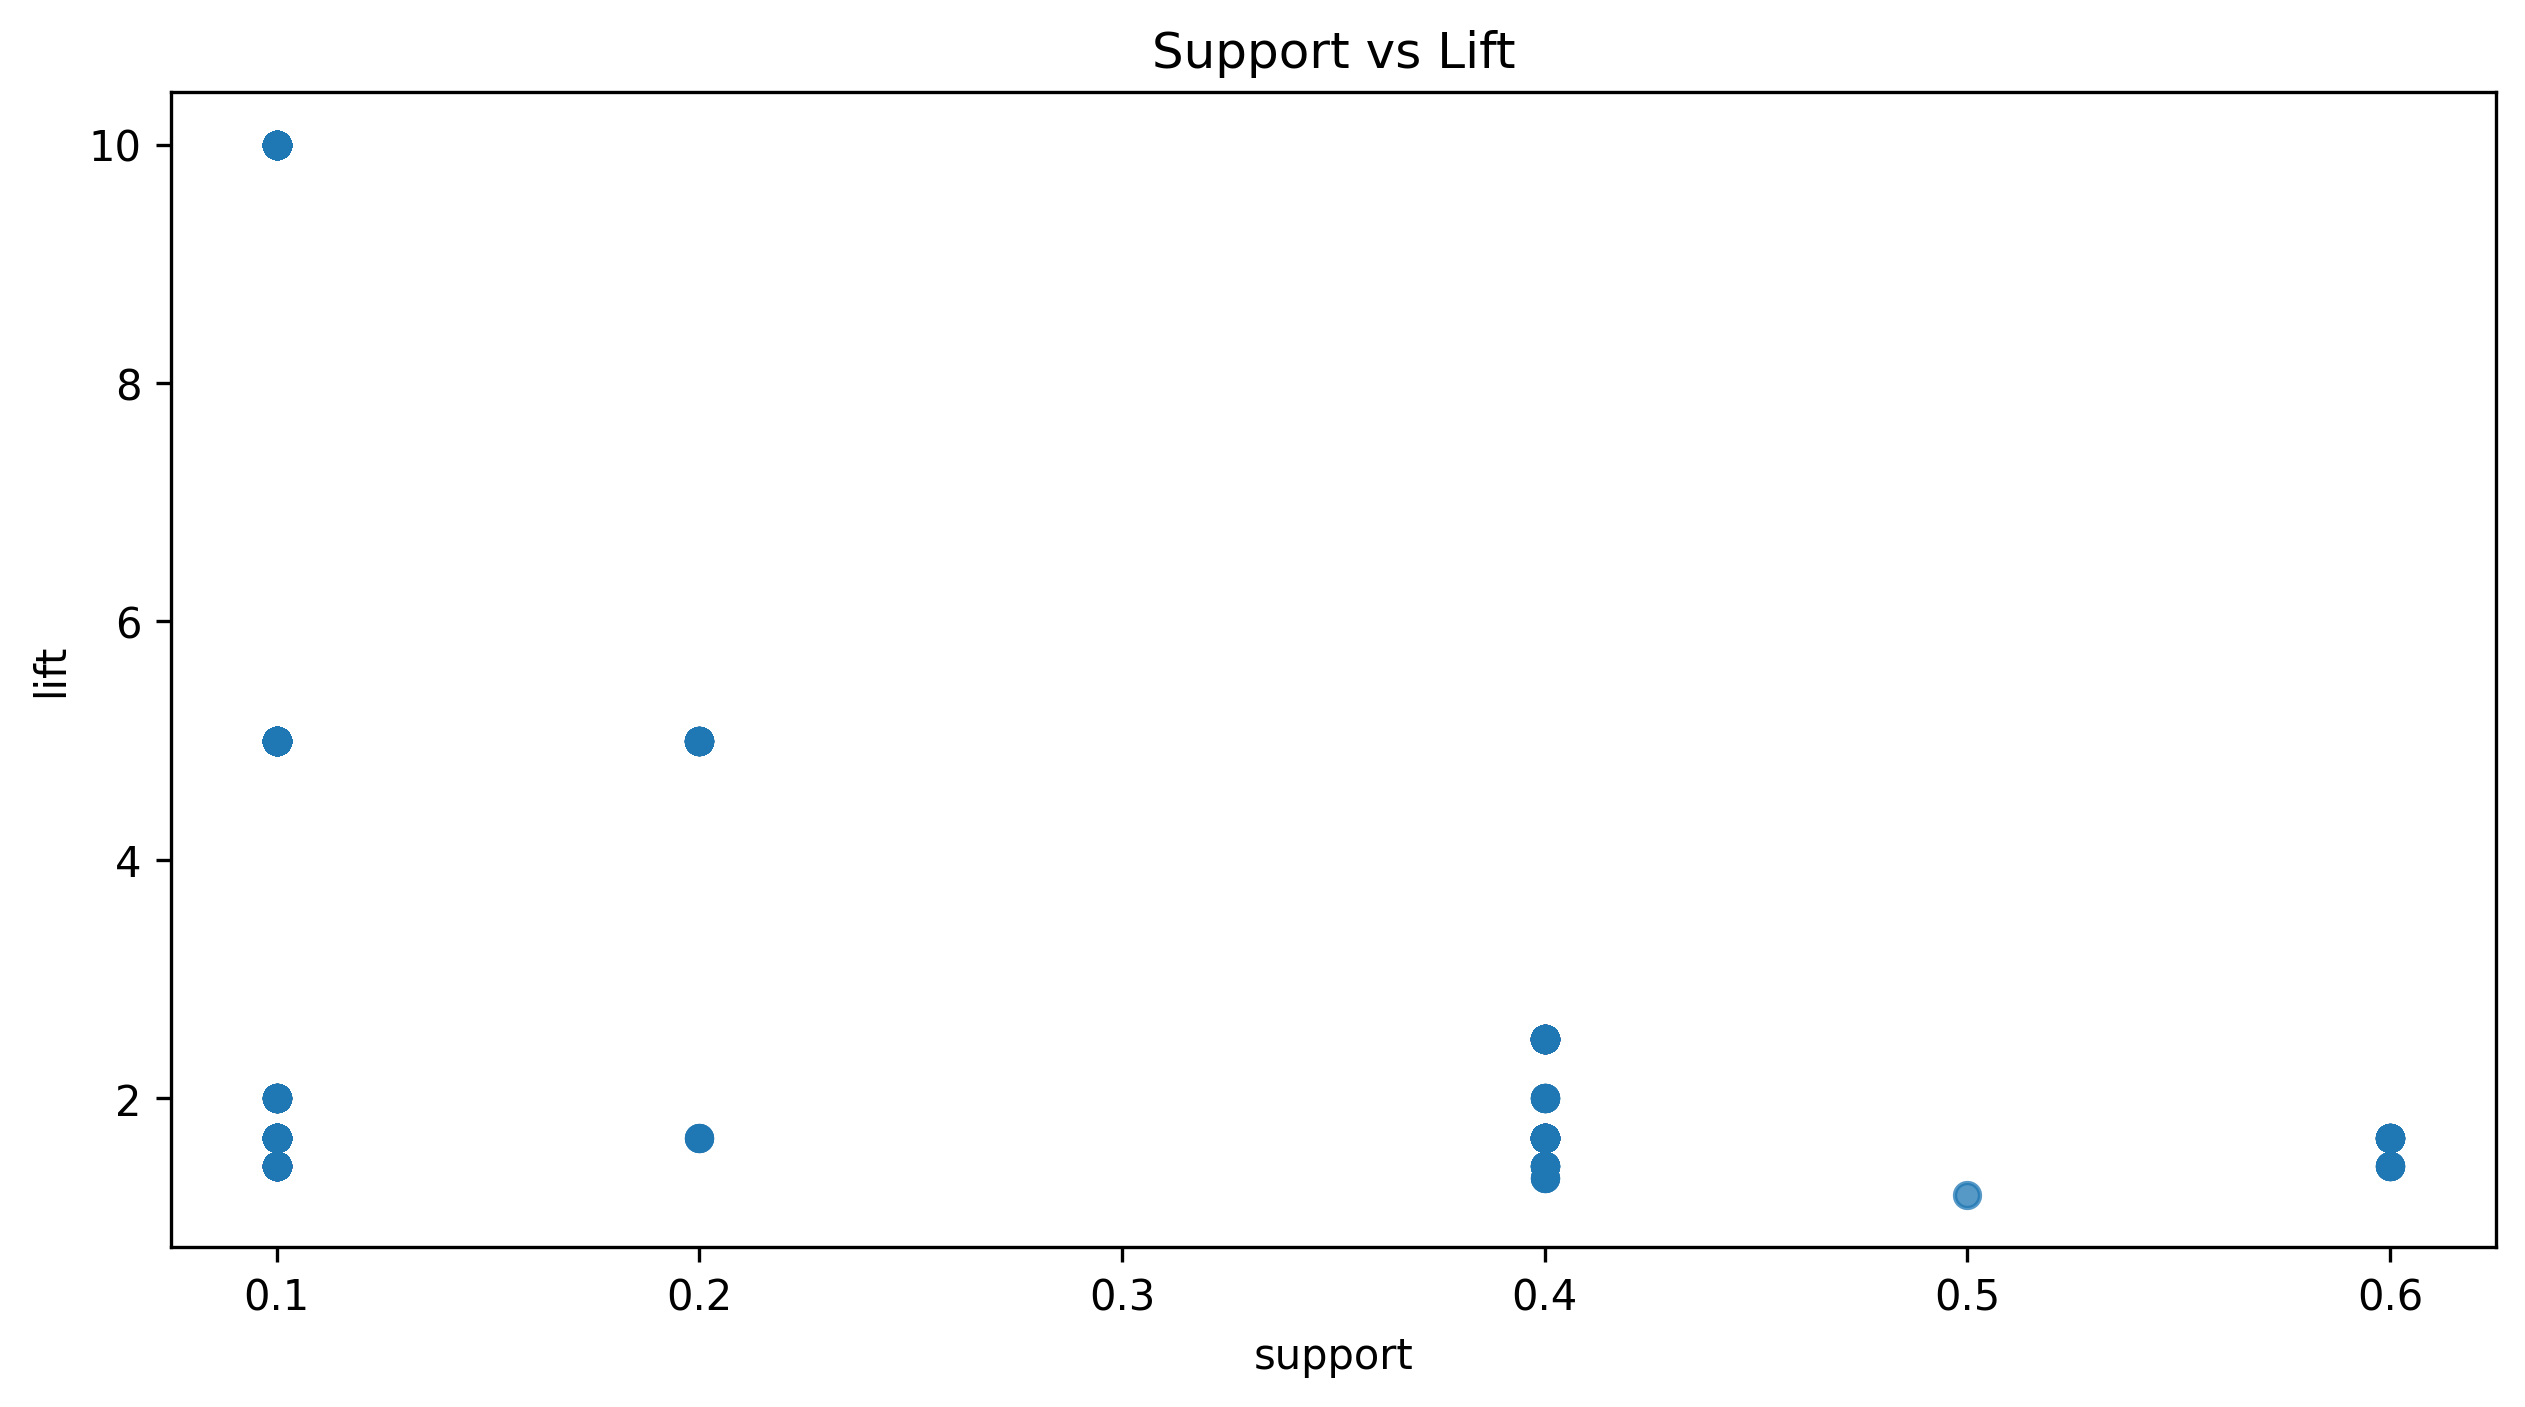

In [12]:
# Scatter plot of Support vs Lift

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')

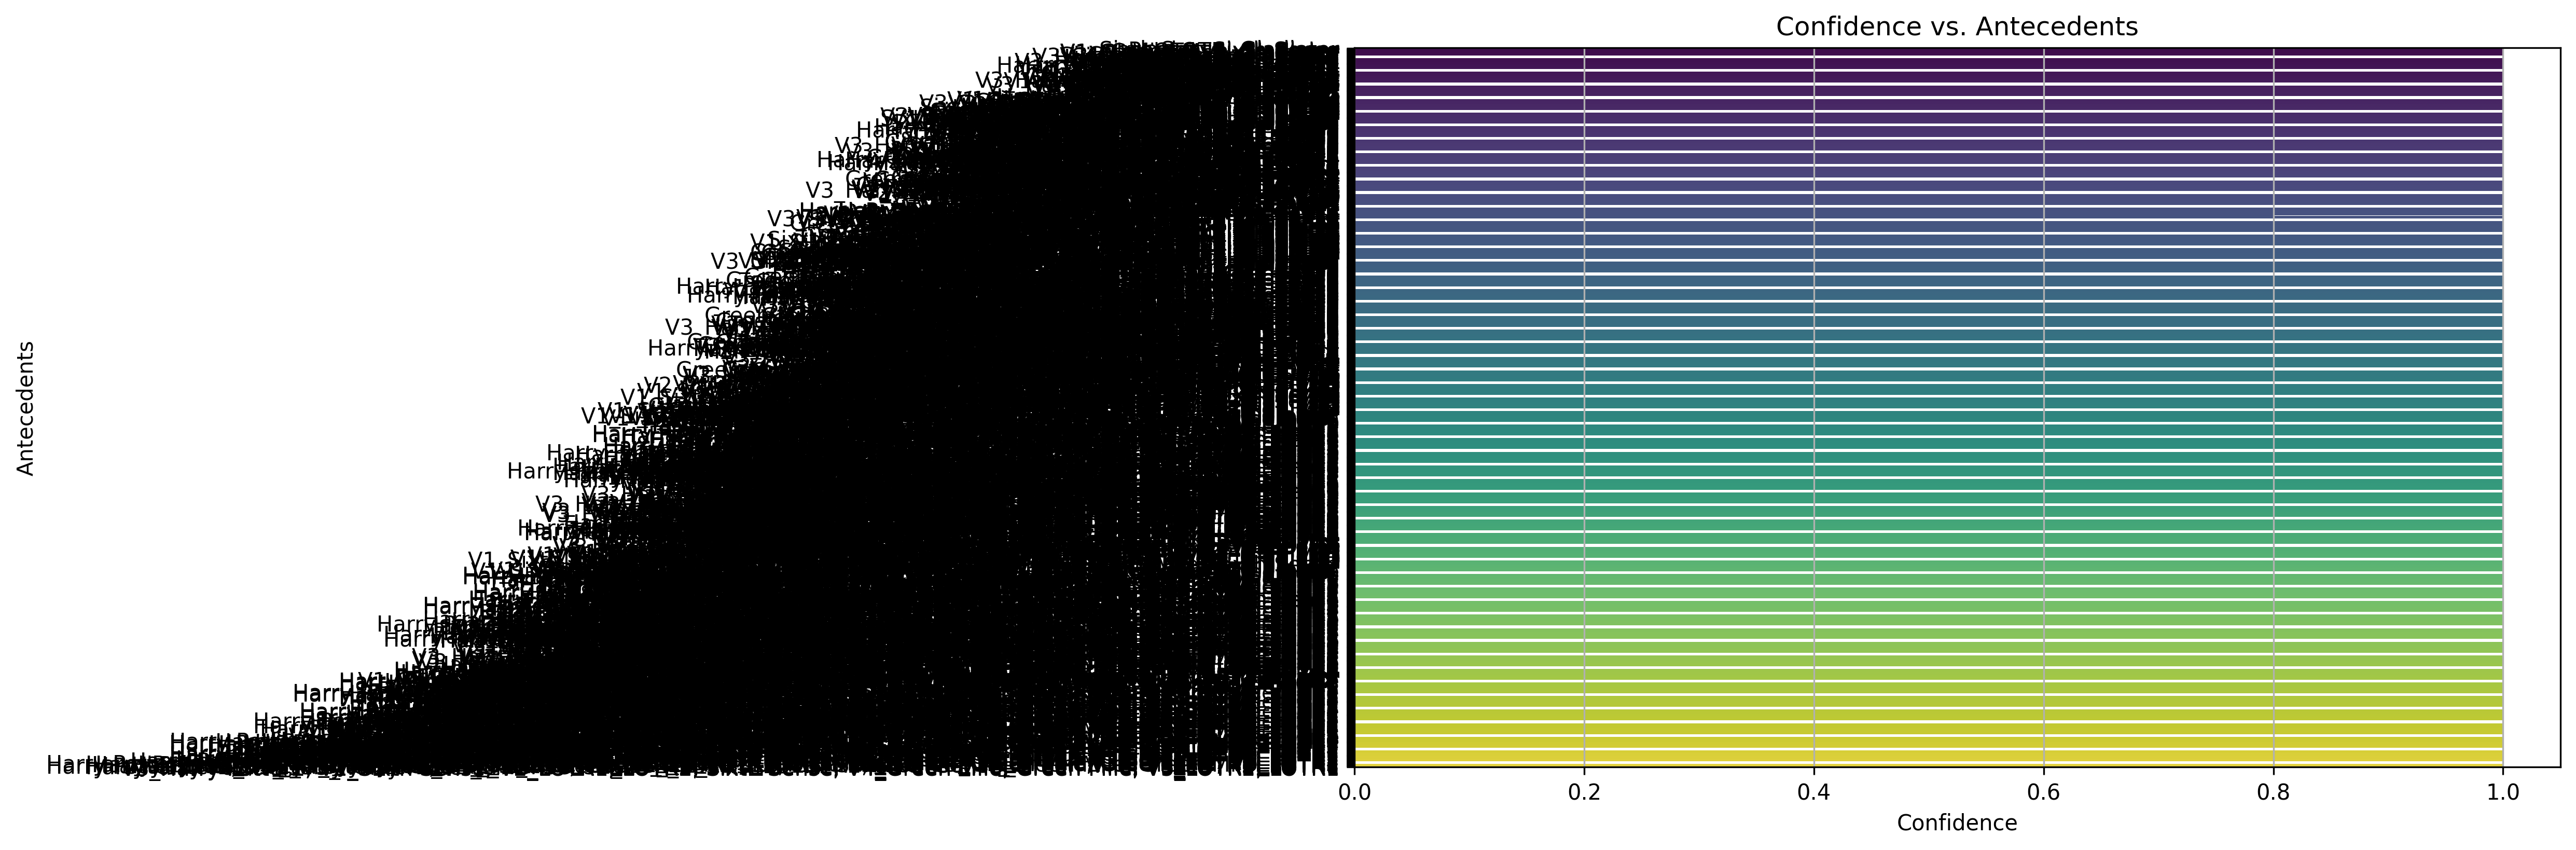

In [13]:
# Bar chart of antecedents and consequents

antecedents = []
consequents = []

for antecedent, consequent in zip(filtered_rules['antecedents'], filtered_rules['consequents']):
    antecedents.append(', '.join(list(antecedent)))
    consequents.append(', '.join(list(consequent)))

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_rules['confidence'], y=antecedents, orient='h', palette='viridis')
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.title('Confidence vs. Antecedents')
plt.grid(axis='x')